# Univariate Feature Analysis

## Introduction
In this section we will go through the data analytics process of Univariate Feature Analysis.

To skip directly to to particular parts, use the following links:
1. **[Libraries / Reading Data](#libraries_reading-data)**
2. **[Feature: Country | Bar-Plot](#country_bar)**
3. **[Feature: City | Bar-Plot](#city_bar)**
4. **[Feature: Industries | BarH-Plot](#industries_barh)**
5. **[Feature: Age | Hist-Chart](#age_hist)**
6. **[Feature: Gender | Pie-Chart](#gender_pie)**
7. **[Feature: Wealth-Source | Pie-Chart](#wealth_source_pie)**




<a id="libraries_reading-data"></a>
## 1. Libraries / Reading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.style.use('ggplot')

In [2]:
df = pd.read_csv("../../data/cleaned_data.csv")

In [3]:
media_dir_univariate = os.path.join("media/univariate_analysis")

<a id="country_bar"></a>
## 2. Feature: Country | Bar-Plot

In [4]:
country_counts = df['country'].value_counts()
country_counts

country
United States    750
China            504
India            157
Germany           87
Russia            79
                ... 
Portugal           1
Georgia            1
Colombia           1
Uzbekistan         1
Armenia            1
Name: count, Length: 65, dtype: int64

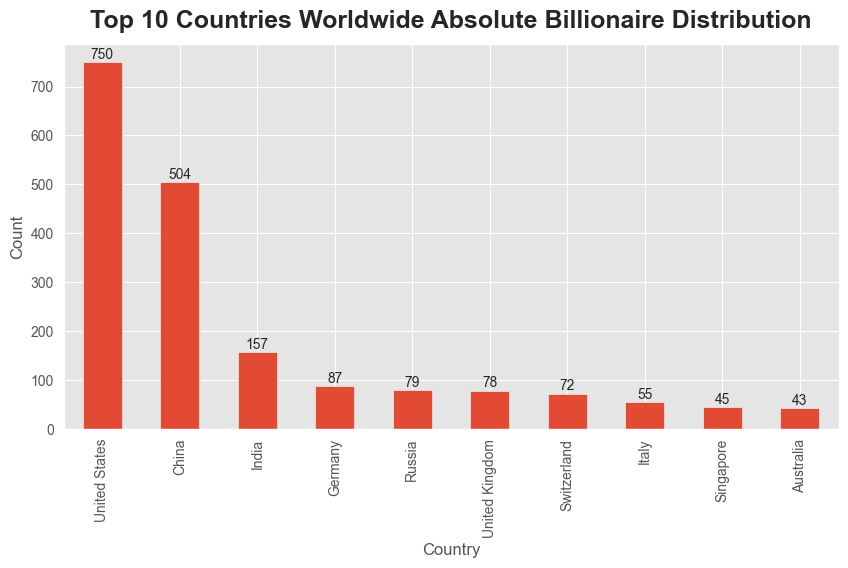

In [5]:
country_counts_top_10 = country_counts.head(10)
ax = country_counts_top_10.plot(kind='bar',
                                figsize=(10, 5))
plt.title('Top 10 Countries Worldwide Absolute Billionaire Distribution',
          fontsize=18,
          fontweight='bold',
          y=1.02)
ax.set_ylabel('Count')
ax.set_xlabel('Country')
for i, count in enumerate(country_counts_top_10):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')
file_name_1 = "Top_10_Countries_Worldwide_Absolute_Billionaire_Distribution.png"
plt.savefig(os.path.join(media_dir_univariate, file_name_1), bbox_inches='tight')
plt.show()

<a id="city_bar"></a>
## 3. Feature: City | Bar-Plot

In [6]:
city_counts = df['city'].value_counts()
city_counts

city
New York       99
Beijing        66
Shanghai       60
Moscow         60
London         59
               ..
Brownsville     1
Montpellier     1
Santa Clara     1
Stuttgart       1
Makati          1
Name: count, Length: 711, dtype: int64

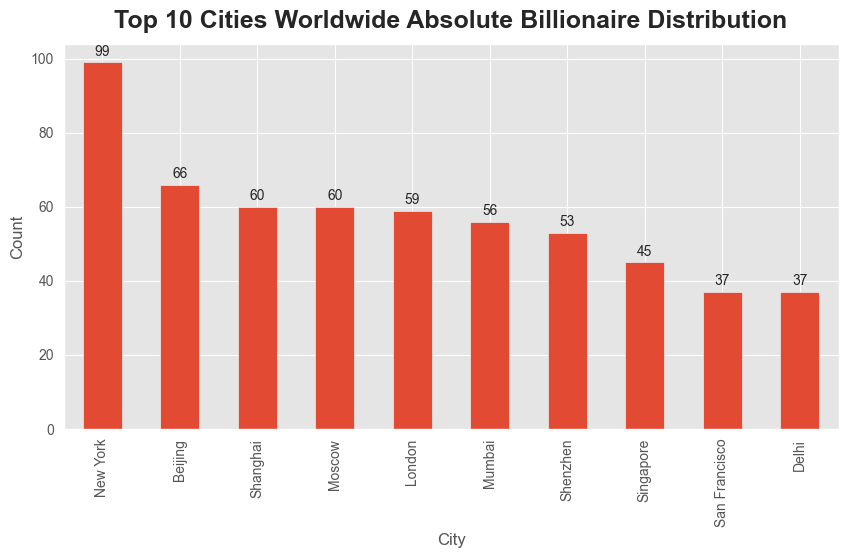

In [7]:
city_counts_top_10 = city_counts.head(10)
ax = city_counts_top_10.plot(kind='bar',
                             figsize=(10, 5))
plt.title("Top 10 Cities Worldwide Absolute Billionaire Distribution",
          fontsize=18,
          fontweight='bold',
          y=1.02)
ax.set_ylabel('Count')
ax.set_xlabel('City')
for i, count in enumerate(city_counts_top_10):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')
file_name_2 = "Top_10_Cities_Worldwide_Absolute_Billionaire_Distribution.png"
plt.savefig(os.path.join(media_dir_univariate, file_name_2), bbox_inches='tight')
plt.show()

<a id="industries_barh"></a>
## 4. Feature: Industries | BarH-Plot

In [8]:
industry_counts = df['industries'] \
    .value_counts().sort_values(ascending=True)

In [9]:
industry_counts

industries
Gambling & Casinos             22
Telecom                        28
Logistics                      32
Sports                         38
Construction & Engineering     41
Service                        48
Metals & Mining                69
Automotive                     69
Media & Entertainment          84
Energy                         93
Real Estate                   156
Diversified                   173
Food & Beverage               187
Healthcare                    188
Fashion & Retail              242
Manufacturing                 288
Technology                    290
Finance & Investments         336
Name: count, dtype: int64

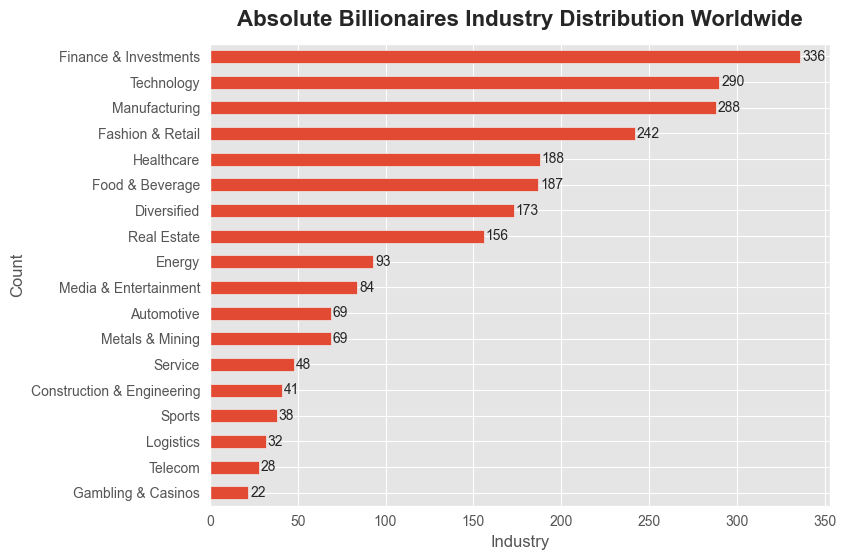

In [10]:
ax = industry_counts.plot(kind='barh',
                          figsize=(8, 6))
plt.title('Absolute Billionaires Industry Distribution Worldwide',
          fontsize=16,
          fontweight='bold',
          y=1.02)
ax.set_ylabel('Count')
ax.set_xlabel('Industry')

for i, count in enumerate(industry_counts):
    plt.text(count + 1, i, str(count), ha='left', va='center')

file_name_3 = "Absolute_Billionaires_Industry_Distribution_Worldwide.png"
plt.savefig(os.path.join(media_dir_univariate, file_name_3), bbox_inches='tight')
plt.show()

<a id="age_hist"></a>
## 5. Feature: Age | Hist-Chart

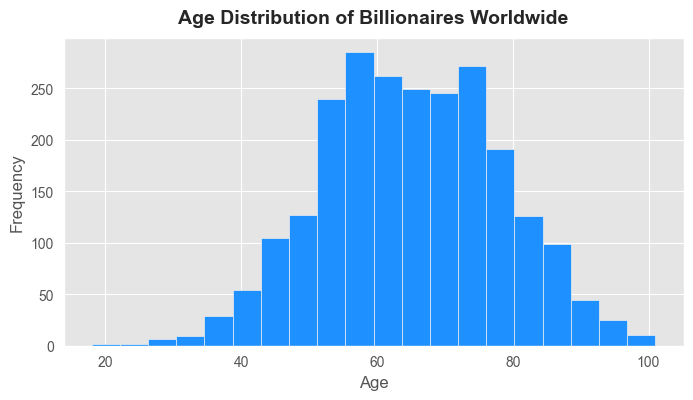

In [11]:
ax = df['age'].plot(kind='hist',
                    bins=20,
                    figsize=(8, 4),
                    color='dodgerblue')
plt.title('Age Distribution of Billionaires Worldwide',
          fontsize=14,
          fontweight='bold',
          y=1.02)
ax.set_xlabel('Age')
file_name_4 = "Age_Distribution_of_Billionaires_Worldwide.png"
plt.savefig(os.path.join(media_dir_univariate, file_name_4), bbox_inches='tight')
plt.show()

<a id="gender_pie"></a>
## 6. Feature: Gender | Pie-Chart

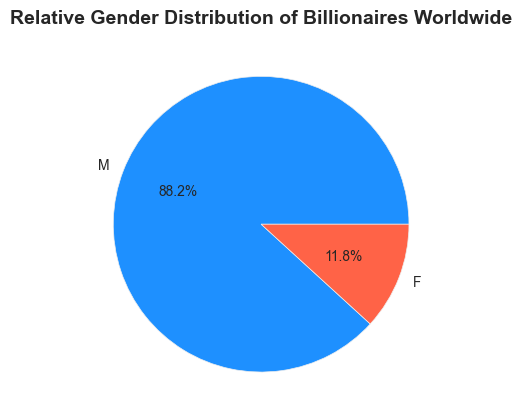

In [12]:
ax = df['gender'].value_counts() \
    .plot(kind='pie',
          autopct='%1.1f%%',
          colors=['dodgerblue', 'tomato']
          )

plt.title("Relative Gender Distribution of Billionaires Worldwide",
          fontweight='bold',
          fontsize=14,
          y=1.02)
ax.set_ylabel('')

file_name_5 = "Relative_Gender_Distribution_of_Billionaires_Worldwide.png"
plt.savefig(os.path.join(media_dir_univariate, file_name_5), bbox_inches='tight')
plt.show()

<a id="wealth_source_pie"></a>
## 7. Feature: Wealth-Source | Pie-Chart

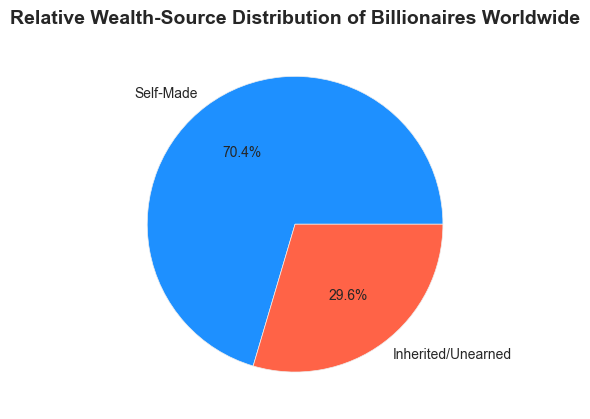

In [13]:
ax = df['wealth_source'].value_counts() \
    .plot(kind='pie',
          autopct='%1.1f%%',
          colors=['dodgerblue', 'tomato']
          )

plt.title("Relative Wealth-Source Distribution of Billionaires Worldwide",
          fontweight='bold',
          fontsize=14,
          y=1.02)
ax.set_ylabel('')

file_name_6 = "Relative_Wealth_Source_Distribution_of_Billionaires_Worldwide.png"
plt.savefig(os.path.join(media_dir_univariate, file_name_6), bbox_inches='tight')
plt.show()